In [9]:
def api_runner():

    from requests import Request, Session
    from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
    import json

    global df
    # Original sandbox environment url = 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
    'start':'1',
    'limit':'15',
    'convert':'USD'
    }
    headers = {
    'Accepts': 'application/json',
    'X-CMC_PRO_API_KEY': 'MyPrivateAPIkeyWasHere',
    }

    session = Session()
    session.headers.update(headers)

    try:
        response = session.get(url, params=parameters)
        data = json.loads(response.text)
        print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
        print(e)

    #for only keeping data in the panda dataframe
    #df2 = pd.json_normalize(data['data'])
    #df2['timestamp'] = pd.Timestamp.now()
    #df = df.append(df2)  ---deprecated append used in the video - concat used now
    #df = pd.concat([df, df2])

    import pandas as pd

    # This allows you to see all the columns and rows

    pd.set_option('display.max_columns', None)
    pd.set_option('display.max_rows', None)

    # This normalizes the data and converts it to a Pandas dataframe
    
    df = pd.json_normalize(data['data'])
    #df['timestamp'] = pd.to_datetime('now') ---deprecated to_datetime used in the video - Timestamp.now used now
    df['timestamp'] = pd.Timestamp.now()
    df

    import os

    if not os.path.isfile(r'API.csv'):
        df.to_csv(r'API.csv', header='column_names')
    else:
        df.to_csv(r'API.csv', mode='a', header=False)

In [ ]:
import os 
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner completed')
    sleep(60) #sleep for 1 minute
exit()

In [5]:
import pandas as pd


In [ ]:
df72 = pd.read_csv(r'API.csv')
df72

In [ ]:
#Gget rid of the scientific notation

pd.set_option('display.float', lambda x: '%.5f' % x)
df72

In [ ]:
# Now let's look at the coin trends over time

df3 = df72.groupby('name', sort=False)[['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d']].mean()
df3

In [9]:
df4 = df3.stack()
df4

name                                 
Bitcoin  quote.USD.percent_change_1h      0.09270
         quote.USD.percent_change_24h    -5.92868
         quote.USD.percent_change_7d    -13.31116
         quote.USD.percent_change_30d   -11.00516
         quote.USD.percent_change_60d   -17.80312
                                           ...   
TRON     quote.USD.percent_change_24h    -2.96625
         quote.USD.percent_change_7d     -5.56995
         quote.USD.percent_change_30d    -7.49334
         quote.USD.percent_change_60d   -10.29644
         quote.USD.percent_change_90d    -4.47369
Length: 90, dtype: float64

In [10]:
df5 = df4.to_frame(name='values')
df5

values
name                                          
Bitcoin quote.USD.percent_change_1h    0.09270
        quote.USD.percent_change_24h  -5.92868
        quote.USD.percent_change_7d  -13.31116
        quote.USD.percent_change_30d -11.00516
        quote.USD.percent_change_60d -17.80312
...                                        ...
TRON    quote.USD.percent_change_24h  -2.96625
        quote.USD.percent_change_7d   -5.56995
        quote.USD.percent_change_30d  -7.49334
        quote.USD.percent_change_60d -10.29644
        quote.USD.percent_change_90d  -4.47369

[90 rows x 1 columns]

In [11]:
df5.count()


values    90
dtype: int64

In [12]:
# Because of how it's structured above we need to set an index. I don't want to pass a column as an index for this dataframe
# So I'm going to create a range and pass that as the dataframe. You can make this more dynamic, but I'm just going to hard code it

index = pd.Index(range(90))

df6 = df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.09270
1,Bitcoin,quote.USD.percent_change_24h,-5.92868
2,Bitcoin,quote.USD.percent_change_7d,-13.31116
3,Bitcoin,quote.USD.percent_change_30d,-11.00516
4,Bitcoin,quote.USD.percent_change_60d,-17.80312
...,...,...,...
85,TRON,quote.USD.percent_change_24h,-2.96625
86,TRON,quote.USD.percent_change_7d,-5.56995
87,TRON,quote.USD.percent_change_30d,-7.49334
88,TRON,quote.USD.percent_change_60d,-10.29644


In [21]:
# Change the column name

df7 = df6.rename(columns={'level_1': 'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.09270
1,Bitcoin,quote.USD.percent_change_24h,-5.92868
2,Bitcoin,quote.USD.percent_change_7d,-13.31116
3,Bitcoin,quote.USD.percent_change_30d,-11.00516
4,Bitcoin,quote.USD.percent_change_60d,-17.80312
...,...,...,...
85,TRON,quote.USD.percent_change_24h,-2.96625
86,TRON,quote.USD.percent_change_7d,-5.56995
87,TRON,quote.USD.percent_change_30d,-7.49334
88,TRON,quote.USD.percent_change_60d,-10.29644


In [23]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d'], ['1h', '24h', '7d', '30d', '60d', '90d'])

In [24]:
df7

,name,percent_change,values
0,Bitcoin,1h,0.09270
1,Bitcoin,24h,-5.92868
2,Bitcoin,7d,-13.31116
3,Bitcoin,30d,-11.00516
4,Bitcoin,60d,-17.80312
...,...,...,...
85,TRON,24h,-2.96625
86,TRON,7d,-5.56995
87,TRON,30d,-7.49334
88,TRON,60d,-10.29644


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

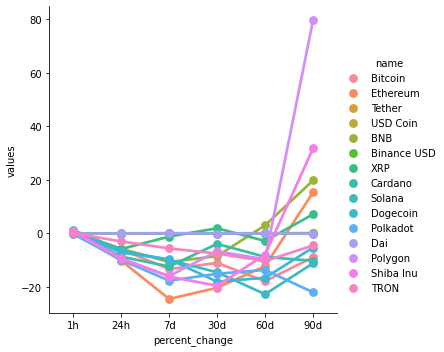

In [25]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')

In [28]:
# Now to do something much simpler
# we are going to create a dataframe with the columns we want

df10 = df72[['name', 'quote.USD.price', 'timestamp']]
df10 = df10.query("name == 'Bitcoin'")
df10


,name,quote.USD.price,timestamp
0,Bitcoin,18827.58010,2022-09-18 23:08:12.428982
15,Bitcoin,18827.58010,2022-09-18 23:08:15.861676
30,Bitcoin,18827.58010,2022-09-18 23:08:19.103020


<AxesSubplot:xlabel='timestamp', ylabel='quote.USD.price'>

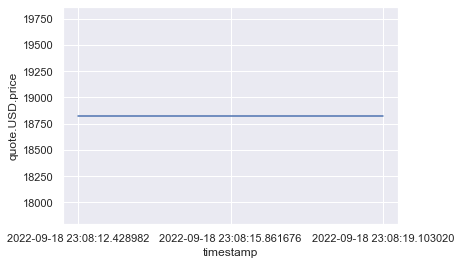

In [30]:
sns.set_theme(style='darkgrid')
sns.lineplot(x='timestamp', y='quote.USD.price', data = df10)